# scRNA-seq analysis of human fetal pancreas data

see also curation notebook: curate_Cao2020

In [1]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import seaborn as sns

In [2]:
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.0 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
sc.set_figure_params(frameon=False)

## Load data

In [5]:
cao_fetal = sc.read('./data/cao_fetal_endo.h5ad')

In [6]:
cao_fetal.obs.louvain_anno_broad.value_counts()

b'beta'               1575
b'alpha'               662
b'delta'               607
b'epsilon'             106
b'alpha precursos'      94
b'Fev+ precursor'       53
b'beta precursor'       37
Name: louvain_anno_broad, dtype: int64

In [7]:
# reorder and rename clusters
cao_fetal.obs.louvain_anno_broad.cat.rename_categories(['Fev+ precursor', 'alpha', 'alpha precursor', 'beta', 'beta precursor', 'delta', 'epsilon'], inplace=True)
cao_fetal.obs.louvain_anno_broad.cat.reorder_categories(['Fev+ precursor',  'beta precursor', 'beta', 'alpha precursor', 'alpha', 'delta', 'epsilon'], inplace=True)

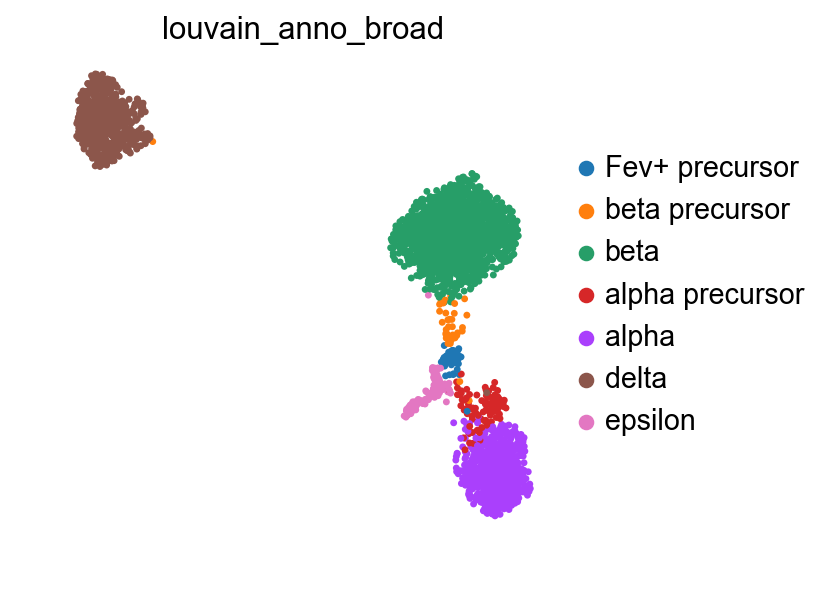

In [9]:
sc.pl.umap(cao_fetal, color=['louvain_anno_broad'], ncols=6)

## Endocrine marker expression

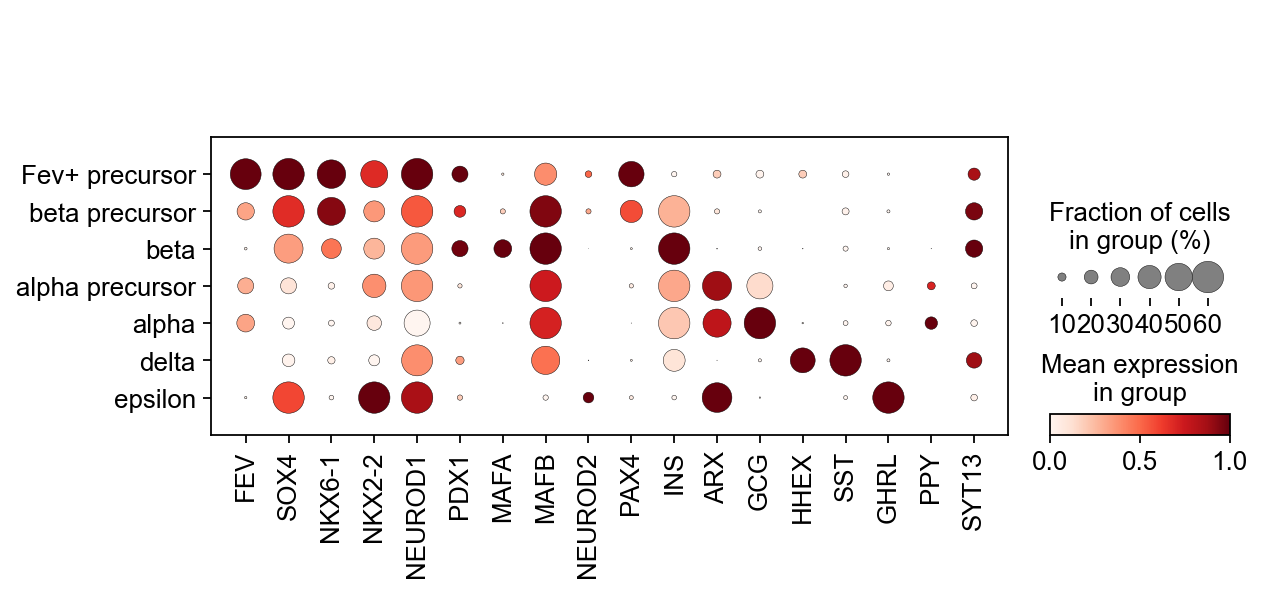

In [11]:
sc.pl.dotplot(cao_fetal, groupby='louvain_anno_broad',
                 var_names=['FEV', 'SOX4', 'NKX6-1', 'NKX2-2', 'NEUROD1', 'PDX1', 'MAFA', 'MAFB', 
                            'NEUROD2', 'PAX4', 'INS', 'ARX', 'GCG', 'HHEX', 'SST', 'GHRL', 'PPY', 'SYT13'],dot_max=0.6,
                 standard_scale='var')

## Figure S2c - Syt13

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


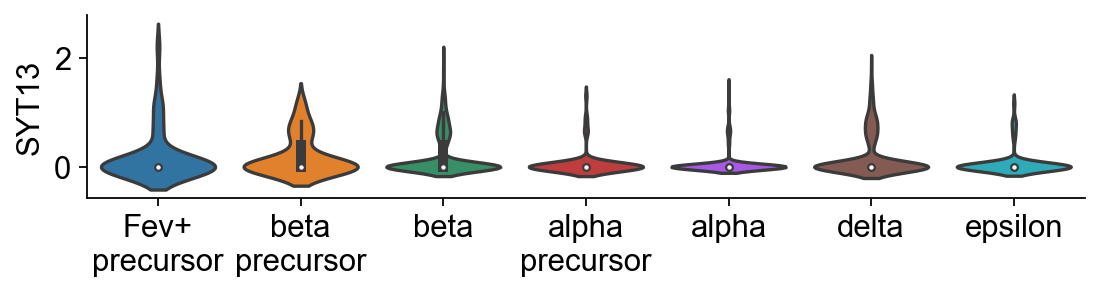

In [20]:
gene = 'SYT13'
obs_df = cao_fetal.obs[['louvain_anno_broad']]
obs_df[gene]=cao_fetal[:, gene].to_df()

fig,ax = pl.subplots(figsize=(8, 1.5))

ax=sns.violinplot(x='louvain_anno_broad', y=gene, palette=cao_fetal.uns['louvain_anno_broad_colors'], 
                  data=obs_df, inner='box', scale='width', linewidth=1.5, legend=False)    
ax.set_xticklabels(['Fev+\nprecursor', 'beta\nprecursor', 'beta', 'alpha\nprecursor', 'alpha', 'delta', 'epsilon'])
pl.xticks(rotation=0)
    #ax.get_xaxis().set_ticks([])
pl.xlabel('')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

filename='./figures/Fig_S2c.pdf'
pl.savefig(filename,dpi=300,format='pdf')
pl.show()